Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['2'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 5 most common venues

In [15]:
London_neig_grouped_mean.shape

(210, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Acton----
                venue  freq
0              travel   0.4
1               shops   0.3
2                food   0.2
3      parks_outdoors   0.1
4  arts_entertainment   0.0


----Addington----
                venue  freq
0              travel  0.50
1                food  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Addiscombe----
                venue  freq
0                food  0.50
1      parks_outdoors  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Aldgate----
                venue  freq
0                food  0.63
1              travel  0.12
2           nightlife  0.11
3  arts_entertainment  0.04
4            building  0.04


----Aldwych----
                venue  freq
0                food  0.49
1  arts_entertainment  0.19
2           nightlife  0.09
3              travel  0.09
4               shops  0.08


----Angel----
                venue  freq
0                food  0.

4            building   0.0


----Cubitt Town----
                venue  freq
0                food  0.33
1      parks_outdoors  0.33
2               shops  0.22
3           nightlife  0.11
4  arts_entertainment  0.00


----De Beauvoir Town----
                venue  freq
0                food  0.53
1           nightlife  0.19
2               shops  0.17
3      parks_outdoors  0.11
4  arts_entertainment  0.00


----Denmark Hill----
            venue  freq
0            food  0.53
1       nightlife  0.21
2           shops  0.11
3        building  0.05
4  parks_outdoors  0.05


----Dulwich----
                venue  freq
0  arts_entertainment  0.25
1                food  0.25
2           nightlife  0.25
3      parks_outdoors  0.25
4            building  0.00


----Ealing----
            venue  freq
0            food  0.47
1          travel  0.18
2       nightlife  0.15
3        building  0.06
4  parks_outdoors  0.06


----Earls Court----
            venue  freq
0            food  0.43
1  

4            building  0.06


----Leytonstone----
                venue  freq
0                food  0.47
1               shops  0.25
2           nightlife  0.17
3              travel  0.06
4  arts_entertainment  0.03


----Limehouse----
                venue  freq
0                food  0.29
1  arts_entertainment  0.24
2      parks_outdoors  0.24
3               shops  0.18
4              travel  0.06


----Lisson Grove----
                venue  freq
0                food  0.51
1               shops  0.22
2           nightlife  0.09
3  arts_entertainment  0.07
4              travel  0.07


----Little Venice----
            venue  freq
0            food  0.56
1       nightlife  0.17
2  parks_outdoors  0.11
3        building  0.06
4           shops  0.06


----Lower Morden----
                venue  freq
0                food  0.25
1           nightlife  0.25
2      parks_outdoors  0.25
3               shops  0.25
4  arts_entertainment  0.00


----Maida Vale----
                venue  

                venue  freq
0                food  0.50
1              travel  0.33
2      parks_outdoors  0.17
3  arts_entertainment  0.00
4            building  0.00


----South Kensington----
       venue  freq
0       food  0.66
1      shops  0.11
2     travel  0.11
3   building  0.04
4  nightlife  0.04


----South Norwood----
            venue  freq
0            food  0.33
1           shops  0.22
2          travel  0.22
3       nightlife  0.11
4  parks_outdoors  0.11


----South Tottenham----
                venue  freq
0                food  0.52
1               shops  0.22
2              travel  0.17
3           nightlife  0.09
4  arts_entertainment  0.00


----South Wimbledon----
       venue  freq
0       food  0.62
1     travel  0.17
2      shops  0.10
3  nightlife  0.07
4   building  0.03


----Southall----
                venue  freq
0                food  0.90
1               shops  0.05
2              travel  0.05
3  arts_entertainment  0.00
4            building  0.00




4  arts_entertainment  0.03


----Whitton----
                venue  freq
0      parks_outdoors   0.4
1                food   0.2
2           nightlife   0.2
3               shops   0.2
4  arts_entertainment   0.0


----Wimbledon----
                venue  freq
0                food  0.49
1               shops  0.24
2           nightlife  0.15
3            building  0.06
4  arts_entertainment  0.03


----Wood Green----
                venue  freq
0                food  0.46
1           nightlife  0.18
2               shops  0.14
3  arts_entertainment  0.07
4            building  0.07


----Woodside----
                venue  freq
0      parks_outdoors  0.50
1                food  0.25
2              travel  0.25
3  arts_entertainment  0.00
4            building  0.00


----Wormwood Scrubs----
                venue  freq
0      parks_outdoors   0.4
1  arts_entertainment   0.2
2            building   0.2
3              travel   0.2
4           education   0.0




Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Acton,travel,shops,food,parks_outdoors,nightlife
2,Addington,travel,shops,food,parks_outdoors,nightlife
3,Addiscombe,food,shops,parks_outdoors,travel,nightlife
6,Aldgate,food,travel,nightlife,building,arts_entertainment
7,Aldwych,food,arts_entertainment,travel,nightlife,shops


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
1,0.000000,0.000000,0.0,0.0,0.200000,0.000000,0.100000,0.300000,0.400000
2,0.000000,0.000000,0.0,0.0,0.250000,0.000000,0.000000,0.250000,0.500000
3,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
6,0.040000,0.040000,0.0,0.0,0.630000,0.110000,0.030000,0.030000,0.120000
7,0.190000,0.030000,0.0,0.0,0.490000,0.090000,0.030000,0.080000,0.090000
...,...,...,...,...,...,...,...,...,...
499,0.000000,0.000000,0.0,0.0,0.200000,0.200000,0.400000,0.200000,0.000000
502,0.027778,0.055556,0.0,0.0,0.486111,0.152778,0.013889,0.236111,0.027778
504,0.071429,0.071429,0.0,0.0,0.464286,0.178571,0.000000,0.142857,0.071429
508,0.000000,0.000000,0.0,0.0,0.250000,0.000000,0.500000,0.000000,0.250000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

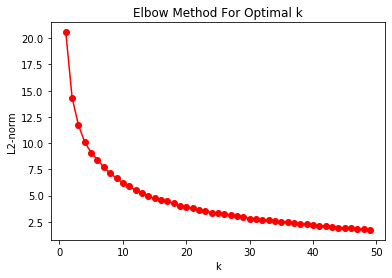

1.726369227257131

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N053=np.empty([49,2])
elbow_N053=pd.DataFrame(elbow_N053,columns=['K','SSD'])
elbow_N053['K']=K
elbow_N053['SSD']=SSD
elbow_N053.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N053.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0,
       3, 3, 2, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 0,
       0, 0, 4, 3, 0, 0, 3, 0, 2, 2, 0, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 4, 0, 0, 3, 3, 3, 1, 0, 4, 4, 0, 3, 0, 3, 0, 0, 1, 0, 2, 3,
       0, 0, 1, 0, 0, 0, 3, 3, 4, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 4,
       0, 1, 0, 0, 4, 3, 4, 4, 4, 3, 2, 0, 1, 4, 3, 3, 3, 0, 3, 0, 3, 0,
       0, 1, 0, 0, 3, 0, 4, 0, 2, 3, 3, 2, 2, 4, 0, 1, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 3, 0, 0, 4, 3, 0, 0, 3, 0, 3, 0, 2, 0, 3, 2, 4, 0, 1, 0,
       3, 4, 2, 0, 3, 3, 0, 1, 0, 3, 0, 0, 3, 3, 4, 3, 0, 0, 3, 0, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N053=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N053=kclusters_N053.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Cricklewood,51.5548,-0.2176,0,food,shops,travel,nightlife,parks_outdoors
105,Islington,Archway,51.5660,-0.1338,0,food,shops,nightlife,travel,building
106,Islington,Holloway,51.5570,-0.1173,0,food,shops,nightlife,travel,parks_outdoors
107,Islington,Barnsbury,51.5442,-0.1171,0,food,arts_entertainment,travel,shops,parks_outdoors
108,Islington,Nag's Head,51.5570,-0.1170,0,food,shops,nightlife,travel,parks_outdoors


Finally, let's visualize the resulting clusters

In [29]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.1).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_bc05_CLUSTER_03.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Cricklewood,51.554800,-0.21760,0,food,shops,travel,nightlife,parks_outdoors
105,Islington,Archway,51.566000,-0.13380,0,food,shops,nightlife,travel,building
106,Islington,Holloway,51.557000,-0.11730,0,food,shops,nightlife,travel,parks_outdoors
107,Islington,Barnsbury,51.544200,-0.11710,0,food,arts_entertainment,travel,shops,parks_outdoors
108,Islington,Nag's Head,51.557000,-0.11700,0,food,shops,nightlife,travel,parks_outdoors
...,...,...,...,...,...,...,...,...,...,...
67,Ealing,Southall,51.512100,-0.37790,0,food,travel,shops,parks_outdoors,nightlife
68,Ealing,Ealing,51.517500,-0.29880,0,food,travel,nightlife,shops,parks_outdoors
57,Ealing,Chiswick,51.492500,-0.26330,0,food,shops,nightlife,parks_outdoors,travel
70,Hammersmith and Fulham,Hammersmith,51.492038,-0.22364,0,food,shops,nightlife,travel,building


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
64,Ealing,West Ealing,51.518980,-0.314980,1,parks_outdoors,food,travel,shops,nightlife
129,Lambeth,Tulse Hill,51.445200,-0.109100,1,parks_outdoors,travel,shops,nightlife,food
134,Southwark,Sydenham Hill,51.432900,-0.069000,1,parks_outdoors,nightlife,travel,shops,food
133,Lewisham,Sydenham Hill,51.432900,-0.069000,1,parks_outdoors,nightlife,travel,shops,food
63,Ealing,Hanwell,51.518900,-0.337600,1,shops,parks_outdoors,travel,nightlife,food
146,Waltham Forest,Snaresbrook,51.587027,0.014563,1,shops,parks_outdoors,travel,nightlife,food
145,Redbridge,Snaresbrook,51.587027,0.014563,1,shops,parks_outdoors,travel,nightlife,food
147,Richmond upon Thames,Kew,51.483700,-0.278000,1,parks_outdoors,nightlife,food,arts_entertainment,travel
42,Croydon,Woodside,51.387077,-0.065331,1,parks_outdoors,travel,food,shops,nightlife
34,Croydon,Forestdale,51.345000,-0.038000,1,parks_outdoors,nightlife,travel,shops,food


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
201,Tower Hamlets,Bromley (also Bromley-by-Bow),51.526631,-0.017232,2,travel,shops,nightlife,food,building
80,Haringey,Finsbury Park,51.570339,-0.101000,2,food,travel,shops,parks_outdoors,nightlife
81,Islington,Finsbury Park,51.570339,-0.101000,2,food,travel,shops,parks_outdoors,nightlife
158,Richmond upon Thames,Strawberry Hill,51.438100,-0.335000,2,travel,shops,parks_outdoors,food,building
35,Croydon,South Norwood,51.398095,-0.076822,2,food,travel,shops,parks_outdoors,nightlife
75,Hammersmith and Fulham,Sands End,51.473000,-0.180000,2,food,travel,parks_outdoors,shops,nightlife
178,Southwark,East Dulwich,51.462000,-0.084000,2,food,travel,shops,parks_outdoors,nightlife
69,Ealing,Norwood Green,51.503900,-0.374100,2,food,travel,shops,parks_outdoors,nightlife
89,Haringey,Tottenham,51.605000,-0.058000,2,travel,arts_entertainment,shops,nightlife,food
185,Tower Hamlets,Blackwall,51.506300,-0.003400,2,travel,food,shops,nightlife,building


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
225,Westminster,Millbank,51.491500,-0.129500,3,food,parks_outdoors,nightlife,arts_entertainment,travel
180,Southwark,Peckham,51.471400,-0.062500,3,food,nightlife,travel,shops,arts_entertainment
25,Camden,Chalk Farm,51.544000,-0.152000,3,food,shops,nightlife,parks_outdoors,building
71,Hammersmith and Fulham,Old Oak Common,51.524400,-0.242100,3,shops,parks_outdoors,food,building,arts_entertainment
84,Haringey,Bounds Green,51.606400,-0.124600,3,food,shops,nightlife,travel,parks_outdoors
115,Kensington and Chelsea,Holland Park,51.507191,-0.205524,3,food,shops,parks_outdoors,nightlife,travel
227,Westminster,St James's,51.508500,-0.133000,3,food,arts_entertainment,shops,nightlife,parks_outdoors
186,Tower Hamlets,Millwall,51.488661,-0.018589,3,parks_outdoors,food,travel,nightlife,shops
82,Haringey,Bowes Park,51.601000,-0.114000,3,food,travel,nightlife,shops,parks_outdoors
189,Tower Hamlets,Leamouth,51.512303,-0.000037,3,food,parks_outdoors,shops,building,travel


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
153,Richmond upon Thames,Ham,51.438655,-0.325586,4,shops,parks_outdoors,nightlife,food,travel
204,Waltham Forest,Highams Park,51.605900,-0.015100,4,shops,travel,building,parks_outdoors,nightlife
55,Croydon,Norbury,51.409200,-0.108300,4,shops,food,building,travel,parks_outdoors
52,Croydon,Old Coulsdon,51.301800,-0.114300,4,shops,food,travel,parks_outdoors,nightlife
51,Croydon,Selsdon,51.345300,-0.053500,4,shops,food,travel,parks_outdoors,nightlife
44,Croydon,Thornton Heath,51.400200,-0.108600,4,shops,parks_outdoors,building,travel,nightlife
43,Croydon,Coulsdon,51.321100,-0.138600,4,shops,nightlife,food,travel,parks_outdoors
41,Croydon,Waddon,51.364300,-0.112500,4,shops,parks_outdoors,food,travel,nightlife
40,Croydon,Croydon,51.372700,-0.109900,4,shops,travel,parks_outdoors,nightlife,food
210,Waltham Forest,Leyton,51.560558,-0.015465,4,shops,food,nightlife,travel,parks_outdoors


In [41]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N053=np.empty([kclusters,2])                                         
Centroids_N053=pd.DataFrame(Centroids_N053, columns=['x-Latitude','y-Longitude']) 
Centroids_N053['x-Latitude']=x
Centroids_N053['y-Longitude']=y
Centroids_N053.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N053.xlsx')

In [42]:
Centroids_N053

,x-Latitude,y-Longitude
0,51.511057,-0.149568
1,51.471126,-0.144974
2,51.476188,-0.162832
3,51.503783,-0.141272
4,51.422412,-0.139989


In [43]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,0,0
building,0,0,0,0,0
education,0,0,0,0,0
event,0,0,0,0,0
food,114,0,12,44,0
nightlife,0,0,0,5,0
parks_outdoors,0,13,0,5,0
shops,0,3,0,4,20
travel,0,1,9,0,0


In [44]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N053=kclusters_N053.append(p_score)

In [45]:
kclusters_N053.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N053.xlsx')
kclusters_N053

0    105.000000
1     15.000000
2     17.000000
3     54.000000
4     19.000000
5      0.249450
6      0.882609
dtype: float64